In [ ]:
!pip install ultralytics

In [ ]:
!pip install opencv-python

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
success = model.export(format="onnx")  # export the model to ONNX format

In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results= model("https://ultralytics.com/images/bus.jpg")


Found https:\ultralytics.com\images\bus.jpg locally at bus.jpg
image 1/1 C:\Users\User\Documents\machine_learning\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 25.0ms
Speed: 6.0ms preprocess, 25.0ms inference, 75.0ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
from PIL import Image
image= Image.open("bus.jpg")
results= model.predict(source=image, save=True)


0: 640x480 4 persons, 1 bus, 1 stop sign, 56.0ms
Speed: 190.3ms preprocess, 56.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


In [1]:
!yolo mode=predict model=yolov8n.pt source=0

^C


In [ ]:
import torch
import numpy as np
import cv2
from time import time
from ultralytics import YOLO

import supervision as sv


class ObjectDetection:

    def __init__(self, capture_index):
       
        self.capture_index = capture_index
        
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print("Using Device: ", self.device)
        
        self.model = self.load_model()
        
        self.CLASS_NAMES_DICT = self.model.model.names
    
        self.box_annotator = sv.BoxAnnotator(sv.ColorPalette.default(), thickness=3, text_thickness=3, text_scale=1.5)
    

    def load_model(self):
       
        # model = YOLO("yolov8m.pt")  # load a pretrained YOLOv8n model
        model = YOLO("yolov8n.pt")
        model.fuse()
    
        return model


    def predict(self, frame):
       
        results = self.model(frame)
        
        return results
    

    def plot_bboxes(self, results, frame):
        
        xyxys = []
        confidences = []
        class_ids = []
        
         # Extract detections for person class
        for result in results:
            boxes = result.boxes.cpu().numpy()
            # class_id = boxes.cls[0]
            # conf = boxes.conf[0]
            # xyxy = boxes.xyxy[0]

            if class_ids == 0.0:
          
              xyxys.append(result.boxes.xyxy.cpu().numpy())
              confidences.append(result.boxes.conf.cpu().numpy())
              class_ids.append(result.boxes.cls.cpu().numpy().astype(int))
            
        
        # Setup detections for visualization
        detections = sv.Detections(
                    xyxy=results[0].boxes.xyxy.cpu().numpy(),
                    confidence=results[0].boxes.conf.cpu().numpy(),
                    class_id=results[0].boxes.cls.cpu().numpy().astype(int),
                    )
        
    
        # Format custom labels
        self.labels = [f"{self.CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
        for _, confidence, class_id, tracker_id
        in detections]
        
        # Annotate and display frame
        frame = self.box_annotator.annotate(scene=frame, detections=detections, labels=self.labels)
        
        return frame
    
    
    
    def __call__(self):

        cap = cv2.VideoCapture(self.capture_index)
        assert cap.isOpened()
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
      
        while True:
          
            start_time = time()
            
            ret, frame = cap.read()
            assert ret
            
            results = self.predict(frame)
            frame = self.plot_bboxes(results, frame)
            
            end_time = time()
            fps = 1/np.round(end_time - start_time, 2)
             
            cv2.putText(frame, f'FPS: {int(fps)}', (20,70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2)
            
            cv2.imshow('YOLOv8 Detection', frame)
 
            if cv2.waitKey(5) & 0xFF == 27:
                
                break
        
        cap.release()
        cv2.destroyAllWindows()
        
        
    
detector = ObjectDetection(capture_index=0)
detector()

In [1]:
from ultralytics import YOLO
import cv2
image = cv2.imread("image1_60_left.jpg")
model = YOLO("best_yolov8.pt")
results = model.predict(image)
result = results[0]


0: 640x512 6 persons, 72.1ms
Speed: 2.6ms preprocess, 72.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


In [8]:
len(result.boxes)

6

In [2]:
import random
box = []
for i in range(len(result.boxes)):
    box.append(result.boxes[i])
    class_id, xyxy, xywh = box[i].cls.item() , box[i].xyxy.tolist(), box[i].xywh.tolist()
    x1, y1, x2, y2 = xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    print(class_id, xyxy, xywh)
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (random.randint(0,255), random.randint(0,255), random.randint(0,255)), 2)
    image = cv2.putText(image, result.names[class_id], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

0.0 [[547.931640625, 696.5862426757812, 587.9410400390625, 804.6864624023438]] [[567.9363403320312, 750.6363525390625, 40.0093994140625, 108.1002197265625]]
0.0 [[382.3617248535156, 712.8582153320312, 415.1719665527344, 812.1238403320312]] [[398.766845703125, 762.4910278320312, 32.81024169921875, 99.265625]]
0.0 [[434.653076171875, 711.4818115234375, 481.1082458496094, 808.6229248046875]] [[457.88067626953125, 760.0523681640625, 46.455169677734375, 97.14111328125]]
0.0 [[1136.162109375, 727.0494995117188, 1154.9908447265625, 772.88916015625]] [[1145.576416015625, 749.9693603515625, 18.8287353515625, 45.83966064453125]]
0.0 [[483.3175964355469, 725.738525390625, 509.95855712890625, 803.1697387695312]] [[496.6380615234375, 764.4541015625, 26.640960693359375, 77.43121337890625]]
0.0 [[509.769287109375, 729.0890502929688, 539.0842895507812, 803.2787475585938]] [[524.4267578125, 766.1838989257812, 29.31500244140625, 74.189697265625]]


In [13]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
xyxy= xyxy[0]
print(xyxy)

[509.769287109375, 729.0890502929688, 539.0842895507812, 803.2787475585938]


In [19]:
x1,y1,x2,y2 = xyxy

ValueError: not enough values to unpack (expected 4, got 1)

In [15]:
import cv2


NameError: name 'x1' is not defined

In [34]:
cv2.imshow('image',image)

: 

In [2]:
import torch
model = torch.load("yolov8n.pt")
print(model)
# model.eval()

{'epoch': -1, 'best_fitness': None, 'model': DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
 

In [3]:
import torch
ckpt = torch.load("best_yolov8.pt")  # applies to both official and custom models
torch.save(ckpt, "updated-model_yolov8.pt")

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")



{'epoch': -1, 'best_fitness': None, 'model': DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
 

In [4]:
import torch
ckpt = torch.load("best_yolov8.pt")  # applies to both official and custom models
torch.save(ckpt, "updated-model_yolov8.pt")

In [5]:
our_model = torch.load("updated-model_yolov8.pt")
print(our_model)

{'epoch': -1, 'best_fitness': None, 'model': DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
 

In [22]:
from pycocotools.coco import COCO 
import os


coco_dataset = COCO(r"C:\Users\User\Documents\machine_learning\yolov7\data\coco\annotations\instances_train2017.json")
print(coco_dataset)


loading annotations into memory...
Done (t=13.57s)
creating index...
index created!


In [8]:
classes = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]

for i in range(len(classes)):
    object_ids = coco_dataset.getCatIds(catNms=[classes[i]])
    img_ids = coco_dataset.getImgIds(catIds=object_ids)
    with open("coco_class_count.txt", "a") as f:
        write_to_file = str((classes[i]) + "," + str(len(img_ids)) + "\n")
        write_class_names = f.write(write_to_file)
        print(write_to_file)


person,64115

bicycle,3252

car,12251

motorcycle,3502

airplane,2986

bus,3952

train,3588

truck,6127

boat,3025

traffic light,4139

fire hydrant,1711

stop sign,1734

parking meter,705

bench,5570

bird,3237

cat,4114

dog,4385

horse,2941

sheep,1529

cow,1968

elephant,2143

bear,960

zebra,1916

giraffe,2546

backpack,5528

umbrella,3968

handbag,6841

tie,3810

suitcase,2402

frisbee,2184

skis,3082

snowboard,1654

sports ball,4262

kite,2261

baseball bat,2506

baseball glove,2629

skateboard,3476

surfboard,3486

tennis racket,3394

bottle,8501

wine glass,2533

cup,9189

fork,3555

knife,4326

spoon,3529

bowl,7111

banana,2243

apple,1586

sandwich,2365

orange,1699

broccoli,1939

carrot,1683

hot dog,1222

pizza,3166

donut,1523

cake,2925

chair,12774

couch,4423

potted plant,4452

bed,3682

dining table,11837

toilet,3353

tv,4561

laptop,3524

mouse,1876

remote,3076

keyboard,2115

cell phone,4803

microwave,1547

oven,2877

toaster,217

sink,4678

refrigerator,2360

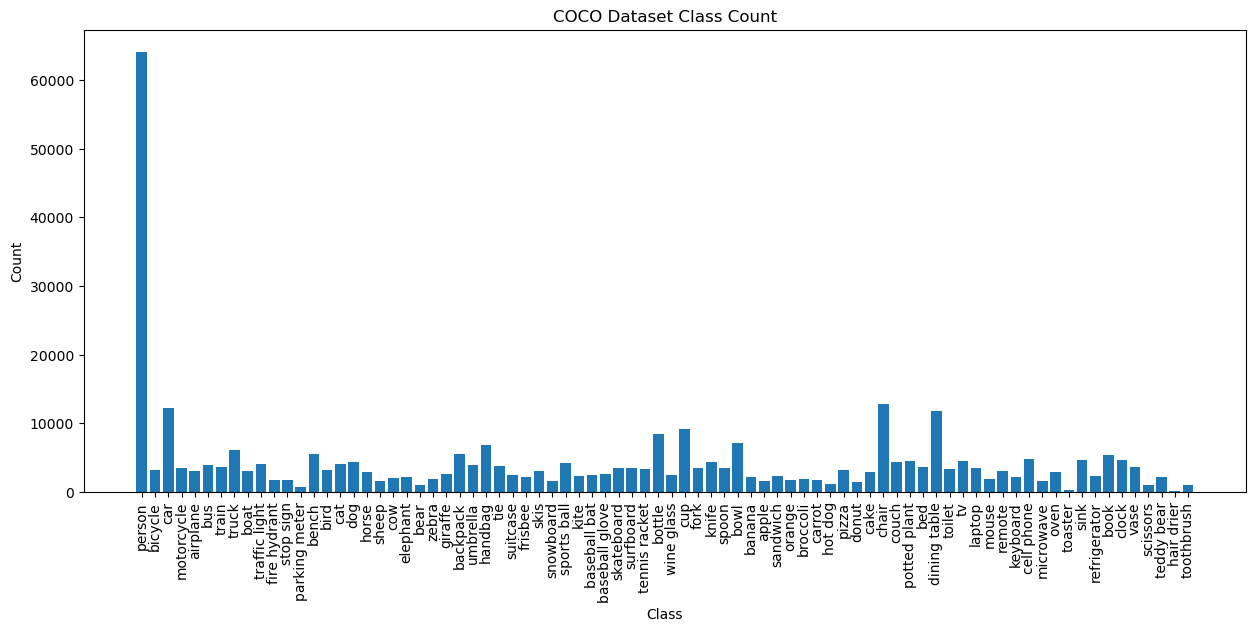

In [13]:
import matplotlib.pyplot as plt
import os
class_names = []
class_counts = []

with open("coco_class_count.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(",")
        class_names.append(line[0])
        class_counts.append(int(line[1]))

fig = plt.figure(figsize=(15, 6))
plt.bar(class_names, class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("COCO Dataset Class Count")
plt.show()

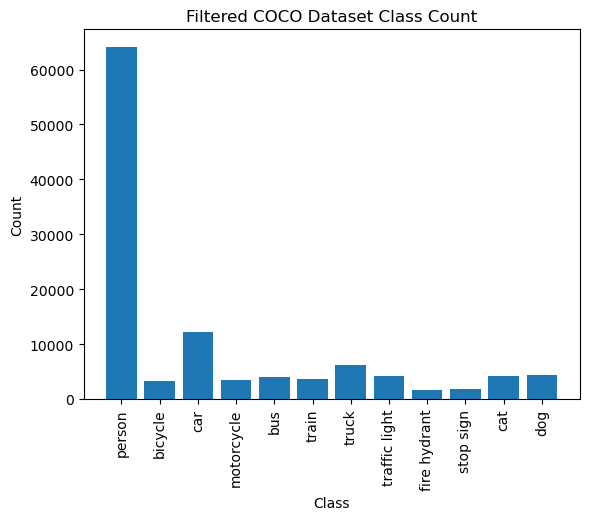

In [23]:
filtered_classes = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'train', 'truck', 'traffic light', 'fire hydrant', 'stop sign', 'cat', 'dog']
class_counts = []



for object_class in filtered_classes:
    object_ids = coco_dataset.getCatIds(catNms=[object_class])
    img_ids = coco_dataset.getImgIds(catIds=object_ids)
    class_counts.append(len(img_ids))

plt.bar(filtered_classes, class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Filtered COCO Dataset Class Count")
plt.show()

In [1]:
import pandas as pd

yolov7 = pd.read_csv("exp80_yolov7.csv", index_col=0)
yolov8 = pd.read_csv("exp80_yolov8.csv", index_col=0)

In [2]:
yolov7.head()

,exp80 - metrics/mAP_0.5:0.95,exp80 - metrics/mAP_0.5:0.95__MIN,exp80 - metrics/mAP_0.5:0.95__MAX
Step,,,
0,0.006258,0.006258,0.006258
1,0.065962,0.065962,0.065962
2,0.123308,0.123308,0.123308
3,0.193988,0.193988,0.193988
4,0.235551,0.235551,0.235551


In [3]:
yolov8.head()

,exp80 - metrics/mAP50-95(B),exp80 - metrics/mAP50-95(B)__MIN,exp80 - metrics/mAP50-95(B)__MAX
Step,,,
1,0.01488,0.01488,0.01488
2,0.09188,0.09188,0.09188
3,0.12966,0.12966,0.12966
4,0.18973,0.18973,0.18973
5,0.23790,0.23790,0.23790


In [4]:
# convert all values to .3f float
yolov7 = yolov7.round(4)
yolov8 = yolov8.round(4)

In [5]:
yolov7.head()

,exp80 - metrics/mAP_0.5:0.95,exp80 - metrics/mAP_0.5:0.95__MIN,exp80 - metrics/mAP_0.5:0.95__MAX
Step,,,
0,0.0063,0.0063,0.0063
1,0.0660,0.0660,0.0660
2,0.1233,0.1233,0.1233
3,0.1940,0.1940,0.1940
4,0.2356,0.2356,0.2356


In [6]:
yolov8.head()

,exp80 - metrics/mAP50-95(B),exp80 - metrics/mAP50-95(B)__MIN,exp80 - metrics/mAP50-95(B)__MAX
Step,,,
1,0.0149,0.0149,0.0149
2,0.0919,0.0919,0.0919
3,0.1297,0.1297,0.1297
4,0.1897,0.1897,0.1897
5,0.2379,0.2379,0.2379


Text(0.5, 1.0, 'YOLOv7-tiny vs YOLOv8n mAP.95')

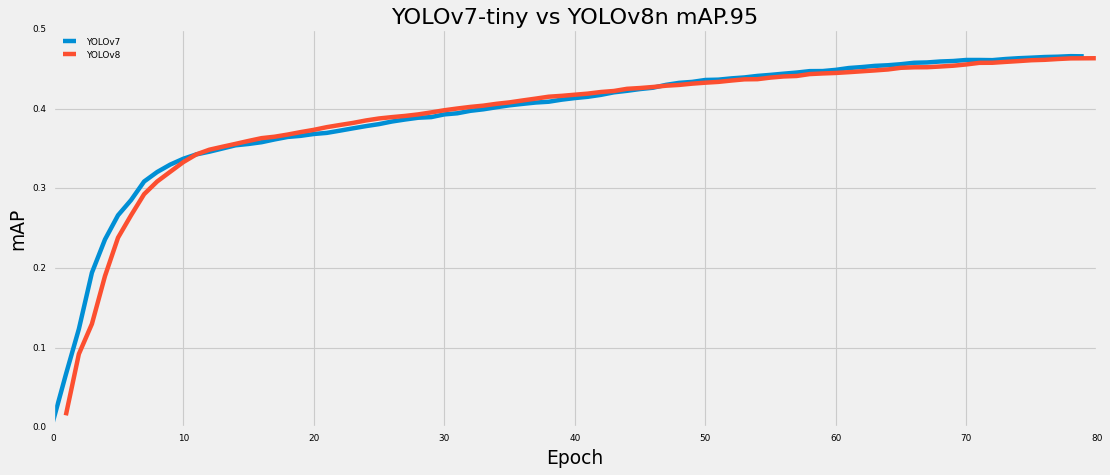

In [19]:
# plot both yolov7 and yolov8 in same figure
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(15, 6))
plt.plot(yolov7["exp80 - metrics/mAP_0.5:0.95"], label="YOLOv7")
plt.plot(yolov8["exp80 - metrics/mAP50-95(B)"], label="YOLOv8")
plt.legend(loc="upper left")
plt.xlabel("Epoch")

plt.ylabel("mAP")
plt.title("YOLOv7-tiny vs YOLOv8n mAP.95")

In [20]:
yolov8_exp100 = pd.read_csv("exp100_sgd_yolov8.csv", index_col=0)
yolov8_exp100.head()

,exp100_sgd - metrics/mAP50-95(B),exp100_sgd - metrics/mAP50-95(B)__MIN,exp100_sgd - metrics/mAP50-95(B)__MAX
Step,,,
1,0.02370,0.02370,0.02370
2,0.10406,0.10406,0.10406
3,0.15276,0.15276,0.15276
4,0.21577,0.21577,0.21577
5,0.25101,0.25101,0.25101


In [21]:
yolov8_exp100 = yolov8_exp100.round(4)

Text(0.5, 1.0, ' Comparison of mAP .95 YOLOv7-tiny 80 epochs vs YOLOv8n 80 epochs vs  YOLOv8n 100 epochs')

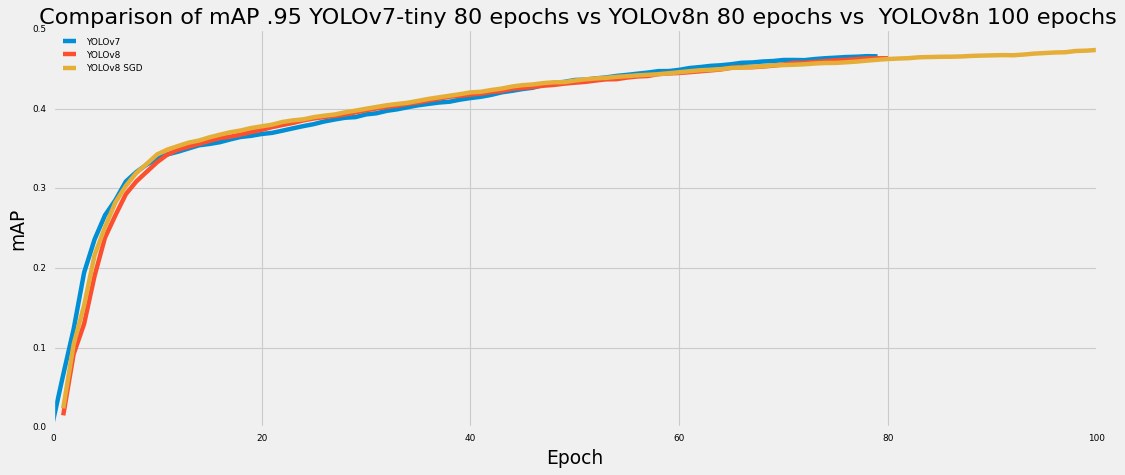

In [24]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(15, 6))
plt.plot(yolov7["exp80 - metrics/mAP_0.5:0.95"], label="YOLOv7")
plt.plot(yolov8["exp80 - metrics/mAP50-95(B)"], label="YOLOv8")
plt.plot(yolov8_exp100["exp100_sgd - metrics/mAP50-95(B)"], label="YOLOv8 SGD")
plt.legend(loc="upper left")
plt.xlabel("Epoch")

plt.ylabel("mAP")
plt.title(" Comparison of mAP .95 YOLOv7-tiny 80 epochs vs YOLOv8n 80 epochs vs  YOLOv8n 100 epochs")